<a href="https://colab.research.google.com/github/Valeria379/Data-Science/blob/main/Lab%E2%84%966_2_%D0%9C%D0%BE%D1%80%D0%BE%D0%B7%D0%BE%D0%B2%D0%B0_%D0%92_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


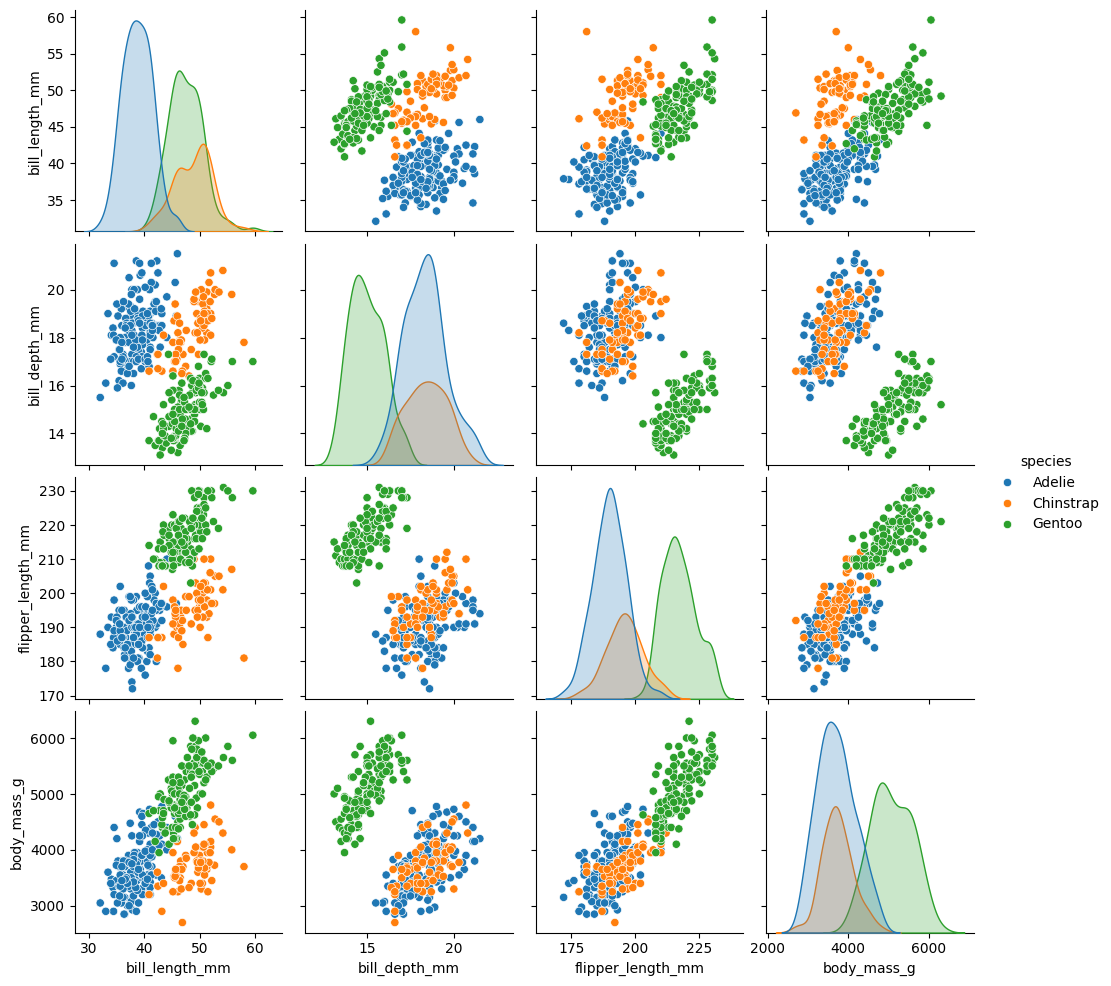

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

##Предпросмотр данных и выявление проблем

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
#проверка на наличие нулевых значений
penguins.isna().sum().sum()/len(penguins)

0.0

In [ ]:
#удаление строк с пропущенными значениями
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
#изменение типа данных
penguins['bill_length_mm'] = penguins['bill_length_mm'].astype(int)
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].astype(int)
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].astype(int)
penguins['body_mass_g'] = penguins['body_mass_g'].astype(int)

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            333 non-null    object
 1   island             333 non-null    object
 2   bill_length_mm     333 non-null    int64 
 3   bill_depth_mm      333 non-null    int64 
 4   flipper_length_mm  333 non-null    int64 
 5   body_mass_g        333 non-null    int64 
 6   sex                333 non-null    object
dtypes: int64(4), object(3)
memory usage: 20.8+ KB


##Применение K-Means к набору данных пингвины

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Выбор числовых атрибутов
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

Для определения оптимального количества кластеров воспользуемся методом локтя

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

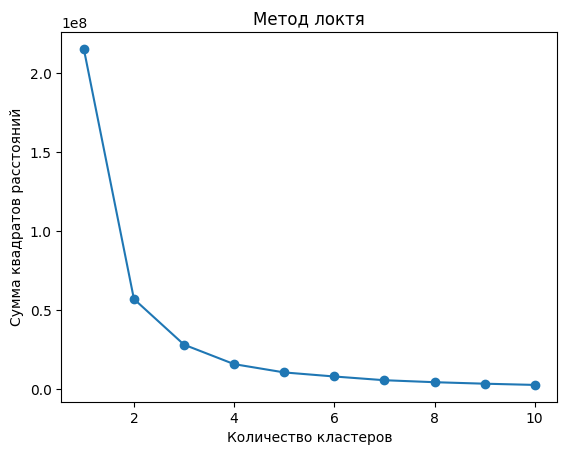

In [ ]:
wcss = [] #оценка качества кластеризации
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

Оптимальным числом кластеров можно считать = 3, теперь необходимо применение K-Means

In [25]:
clusters = 3
kmeans = KMeans(n_clusters=clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Оценим качество кластеризации с помощью коэффициента силуэта

In [26]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Средний балл силуэта для кластеров {clusters}: {silhouette_avg:.2f}')

Средний балл силуэта для кластеров 3: 0.58


Коэффициент силуэта показывает, насколько каждый объект «похож» на другие объекты в том кластере, в который он был распределен в процессе кластеризации, и «не похож» на объекты из других кластеров.

Коэффициент силуэта измеряет, насколько хорошо объекты кластеризованы, и варьируется от -1 до 1. Значение ближе к 1 указывает на хорошую кластеризацию, значение близкое к 0 указывает на перекрытие кластеров, а отрицательное значение указывает на неправильную кластеризацию.

В нашем случае качество умеренное, ближе к среднему. Это значение показывает, что кластеры относительно хорошо разделены, но есть некоторое перекрытие.

##Набор данных с метками кластеров

Добавим ксластеры в датафрейм

In [27]:
penguins['cluster'] = cluster_labels
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39             18                181   
1    Adelie  Torgersen              39             17                186   
2    Adelie  Torgersen              40             18                195   
4    Adelie  Torgersen              36             19                193   
5    Adelie  Torgersen              39             20                190   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe              47             13                214   
340  Gentoo     Biscoe              46             14                215   
341  Gentoo     Biscoe              50             15                222   
342  Gentoo     Biscoe              45             14                212   
343  Gentoo     Biscoe              49             16                213   

     body_mass_g     sex  cluster  
0           3750    Male        1  
1           380

Провизуализируем результат

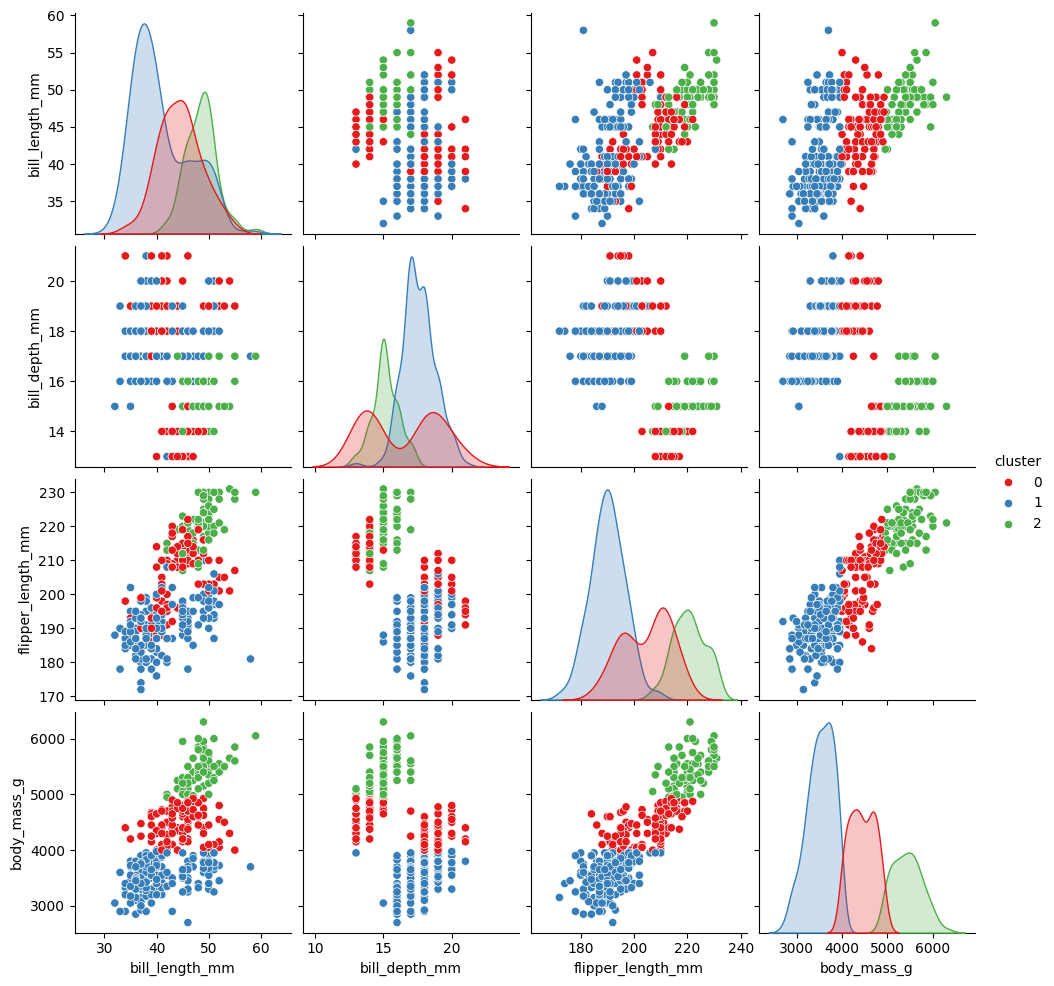

In [28]:
sns.pairplot(data=penguins, hue="cluster", palette='Set1')
plt.show()

На графике видно, что некоторые виды пингвинов хорошо группируются в отдельные кластеры, но есть и перекрытие между видами. Это указывает на то, что признаки bill_length_mm, bill_depth_mm, flipper_length_mm и body_mass_g не полностью разделяют виды.

##Рассчет однородности, полноты и оценки v_measure

In [30]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X)

homogeneity = homogeneity_score(penguins['species'], predicted_labels)
completeness = completeness_score(penguins['species'], predicted_labels)
v_measure = v_measure_score(penguins['species'], predicted_labels)

print(f'Однородность: {homogeneity}')
print(f'Полнота: {completeness}')
print(f'Оценка V-меры: {v_measure}')

Однородность: 0.400588423922462
Полнота: 0.4052070636873124
Оценка V-меры: 0.4028845072990955


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Однородность (0.4): Значение 0.4 указывает на то, что кластеры содержат элементы одного вида, но есть некоторое количество смешанных элементов.
Полнота (0.4): Значение 0.4 указывает на то, что не все элементы одного вида находятся в одном кластере.
Оценка V-меры (0.4): Значение 0.4 показывает, что качество кластеризации умеренное.